# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [26]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [27]:
pd.set_option('display.max_column',None)
df = pd.read_csv('step3_output.csv', index_col=0)
df2 = pd.read_csv('step3_output_dfonly.csv', index_col=0)
print(df.shape)
print(df2.shape)
df.head()

(173, 26)
(327, 26)


,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
2,Hilltop Ski Area,Alaska,2090.0,294.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,1
4,Sunrise Park Resort,Arizona,11100.0,1800.0,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,7.0,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,2
5,Yosemite Ski & Snowboard Area,California,7800.0,600.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,5.0,10.0,2.0,0.4,88.0,475.882353,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,2
8,Boreal Mountain Resort,California,7700.0,500.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,8.0,33.0,6.0,1.0,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,2
9,Dodge Ridge,California,8200.0,1600.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,12.0,67.0,5.0,2.0,862.0,475.882353,152.111111,69.0,350.0,78.0,78.00000,140.0,0.0,2


In [28]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

X = df.drop(['Name','state','AdultWeekend','summit_elev'], axis=1)
y = df.AdultWeekend 

scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 

In [29]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [30]:
# Load all important libraries from sklearn
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [31]:
# Model 2 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# create the prediction
y_pred = model.predict(X_test)

In [32]:
# Review the model metrics
print(f'Explained variance score:  {explained_variance_score(y_test,y_pred)}')
print(f'Mean absolute error:       {mean_absolute_error(y_test, y_pred)}')
print(f'The linear regression model intercept is: {lm.intercept_}')

Explained variance score:  0.7746882811003825
Mean absolute error:       6.779433531675442
The linear regression model intercept is: 56.82665016347713


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

**I noticed that the csv file in the download contains a different name for 'Big Mountain Resort'. In the download it is under the name 'Whitefish Mountain Resort', but still contains the same data for all of the columns.**

I will search for the Whitefish Mountain Resort

In [33]:
df[df['Name'].str.contains('Whitefish')]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Whitefish Mountain Resort,Montana,6817.0,2353.0,0.0,0.0,0.0,3.0,2.0,6.0,0.0,3.0,14.0,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [34]:
# set variable 'to_pred' to the row for Whitefish Mountain and drop the columns not needed for this model
wmr = df[df['Name'].str.contains('Whitefish')]
to_pred_prep = wmr.drop(['Name','state','AdultWeekend','summit_elev'], axis=1)

# scale to_pred
to_scaler = preprocessing.StandardScaler().fit(to_pred_prep)
to_pred_scaled = to_scaler.transform(to_pred_prep) 

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [35]:
model.predict(to_pred_scaled)

array([56.82665016])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [36]:
wmr.AdultWeekend

151    81.0
Name: AdultWeekend, dtype: float64

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

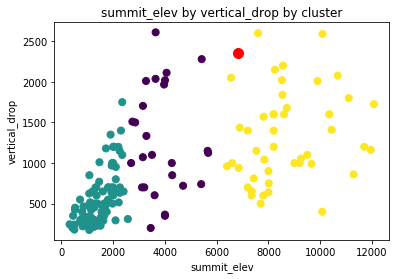

In [37]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(wmr['summit_elev'], wmr['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

In [38]:
# lets create multiple sub-plots with the top 6 coefficients related to AdultWeekend pricing
imp_coeff = pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coefficient']).sort_values('Coefficient',ascending=False).head(6)
imp_coeff

,Coefficient
AdultWeekday,9.702662
vertical_drop,2.493511
daysOpenLastYear,1.535685
triple,1.479324
quad,1.294350
LongestRun_mi,1.074075


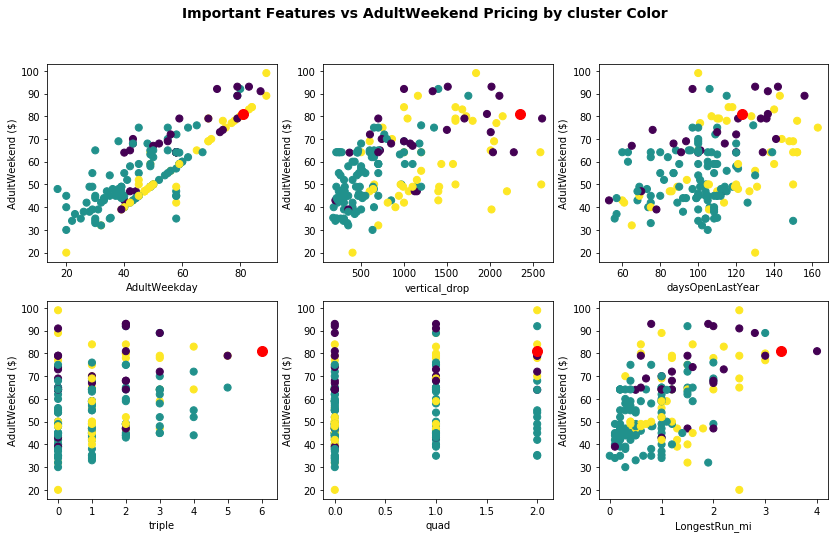

In [39]:
# create a subplot frame
fig, axs = plt.subplots(2,3,figsize=(14,8))

# start the count for feature index value in the imp_coeff table
n = 0

# use a for loop to create scatter plots of the important features vs. AdultWeekend price
for ax_r in axs:
    for ax_c in ax_r:
        col = imp_coeff.index[n]
        ax_c.scatter(df[col], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis')
        ax_c.scatter(wmr[col], wmr['AdultWeekend'], c='red', s=100)
        ax_c.set_xlabel(col)
        ax_c.set_ylabel('AdultWeekend ($)')
        n+=1
        
plt.suptitle('Important Features vs AdultWeekend Pricing by cluster Color', fontsize=14, fontweight='heavy')
plt.show()

### Creaet model using df2 (Dataframe with limited outlier removal)

In [40]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

X2 = df2.drop(['Name','state','AdultWeekend','summit_elev'], axis=1)
y = df2.AdultWeekend 

scaler = preprocessing.StandardScaler().fit(X2)
X_scaled=scaler.transform(X2) 

In [41]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [42]:
# Model 2 
lm2 = linear_model.LinearRegression()
model2 = lm.fit(X_train,y_train)

# create the prediction
y_pred = model2.predict(X_test)

In [43]:
# Review the model metrics
print(f'Explained variance score:  {explained_variance_score(y_test,y_pred)}')
print(f'Mean absolute error:       {mean_absolute_error(y_test, y_pred)}')
print(f'The linear regression model intercept is: {lm.intercept_}')

Explained variance score:  0.9352605460142328
Mean absolute error:       5.060326254219465
The linear regression model intercept is: 63.98401461006501


#### Predict using the alternative model

In [44]:
# set variable 'to_pred' to the row for Whitefish Mountain and drop the columns not needed for this model
to_pred2 = df2[df2['Name'].str.contains('Whitefish')]
to_pred_prep2 = to_pred2.drop(['Name','state','AdultWeekend','summit_elev'], axis=1)

# scale to_pred
to_scaler2 = preprocessing.StandardScaler().fit(to_pred_prep2)
to_pred_scaled2 = to_scaler2.transform(to_pred_prep2) 

In [45]:
model2.predict(to_pred_scaled2)

array([63.98401461])

In [46]:
# set variable 'to_pred' to the row for Whitefish Mountain and drop the columns not needed for this model
wmr2 = df2[df2['Name'].str.contains('Whitefish')]
to_pred_prep2 = wmr2.drop(['Name','state','AdultWeekend','summit_elev'], axis=1)

# scale to_pred
to_scaler2 = preprocessing.StandardScaler().fit(to_pred_prep2)
to_pred_scaled2 = to_scaler2.transform(to_pred_prep2) 

In [47]:
# lets create multiple sub-plots with the top 6 coefficients related to AdultWeekend pricing
imp_coeff2 = pd.DataFrame(data=model2.coef_, index=X2.columns, columns=['Coefficient']).sort_values('Coefficient',ascending=False).head(6)
imp_coeff2

,Coefficient
AdultWeekday,19.886197
Runs,1.579292
daysOpenLastYear,1.468666
NightSkiing_ac,1.371715
quad,1.285200
vertical_drop,1.109944


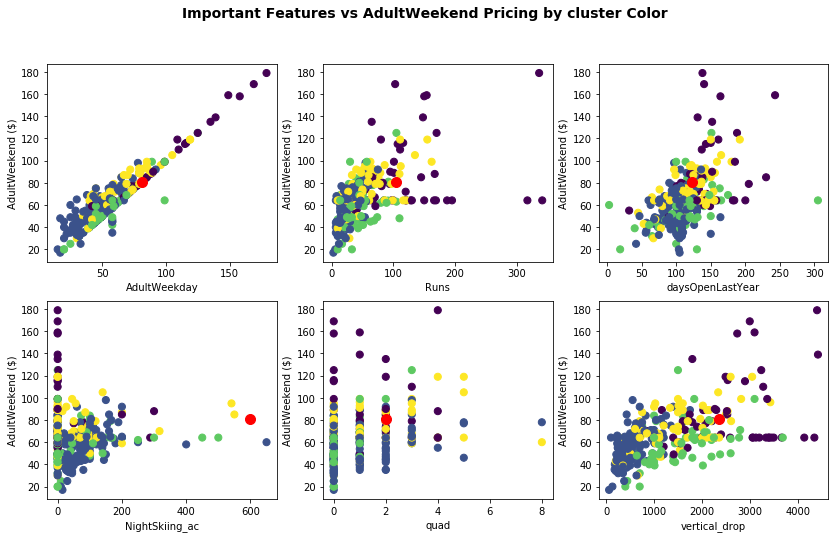

In [48]:
# create a subplot frame
fig, axs = plt.subplots(2,3,figsize=(14,8))

# start the count for feature index value in the imp_coeff table
n = 0

# use a for loop to create scatter plots of the important features vs. AdultWeekend price
for ax_r in axs:
    for ax_c in ax_r:
        col = imp_coeff2.index[n]
        ax_c.scatter(df2[col], df2['AdultWeekend'], c=df2['clusters'], s=50, cmap='viridis')
        ax_c.scatter(wmr2[col], wmr2['AdultWeekend'], c='red', s=100)
        ax_c.set_xlabel(col)
        ax_c.set_ylabel('AdultWeekend ($)')
        n+=1
        
plt.suptitle('Important Features vs AdultWeekend Pricing by cluster Color', fontsize=14, fontweight='heavy')
plt.show()

## Finalize Code

 Making sure our code as well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [49]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib')
dump(model2, 'models/regression_model2_adultweekend.joblib')

['models/regression_model2_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [25]:
# I would like help on this step to understand a best-practice for doing this.